Pada kesempatan kali ini kita akan melakukan pengolahan data covid-19 di Indonesia. Data ini diambil dari situs kawalcovid19.
Data diambil sebagian dari tanggal 1 Juli 2021 - 14 November 2021.

Pada kesempatan kali ini kita akan coba melakukan forecasting dengan menerapkan metode data science yang sudah kita pelajari sebelumnya

1. Business Understanding / Question

Pada kesempatan kali ini kita ingin mengetahui bagaimana perkembangan kasus baru pada tanggal 15 Nov 2021 - 14 Des 2021 di Indonesia. Jika diasumsikan tidak adanya outbreak mendadak dan masuknya varian baru apakah kasusnya bisa menurun dan sejauh apa menurunnya. 

2. Data Collection 

Disini kita akan mencoba untuk mengumpulkan data yang kita butuhkan. Beruntungnya, kita sudah memiliki datanya dan hanya tinggal melakukan pemanggilan.

In [152]:
#import semua package/library pada sel ini, jika butuh memasukkan package/library baru maka run ulang sel ini
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [5]:
#panggil dalam bentuk dataframe pada langkah kali ini, dan tampilkan dengan metode head
data = pd.read_csv('covid_indonesia_2.csv')
display(data.tail())

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
132,2021-11-10,480,4249323,9537,531,4096194,14,143592
133,2021-11-11,435,4249758,9486,470,4096664,16,143608
134,2021-11-12,399,4250157,9305,560,4097224,20,143628
135,2021-11-13,359,4250516,9198,451,4097675,15,143643
136,2021-11-14,339,4250855,9018,503,4098178,16,143659


2. Data Preparation

Pada langkah ini kita akan menyiapkan data yang kita butuhkan. kita akan menggunakan dua kolom pada kesempatan kali ini yaitu total kasus dan tanggal. pertama kita lihat dulu detail dari dataset kita.

In [8]:
# menggunakan statistic deskriptive untuk melihat informasi data secara ringkas
display(data.describe())

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


In [9]:
# tuliskan kode disini
# expected result

,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia
count,137.000000,1.370000e+02,137.000000,137.000000,1.370000e+02,137.000000,137.00000
mean,15128.343066,3.800636e+06,212836.240876,16188.065693,3.467221e+06,621.664234,120578.20438
std,16758.477055,6.121355e+05,201927.468029,15064.380154,7.427454e+05,614.988956,28539.47019
min,244.000000,2.203108e+06,9018.000000,451.000000,1.890287e+06,11.000000,58995.00000
25%,1053.000000,3.532567e+06,22541.000000,1946.000000,2.907920e+06,50.000000,100636.00000
50%,5436.000000,4.140634e+06,138630.000000,12474.000000,3.864848e+06,493.000000,137156.00000
75%,29745.000000,4.228552e+06,380797.000000,29794.000000,4.063295e+06,1128.000000,142716.00000
max,56757.000000,4.250855e+06,574135.000000,48832.000000,4.098178e+06,2069.000000,143659.00000


lalu kita lihat tipe data dari semua kolom pada dataset

In [11]:
# ingin melihat tipe dari masing2 kolom variabel
display(data.dtypes)

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

In [11]:
# tuliskan kode disini
# expected result

Tanggal            object
Kasus_harian        int64
Total_kasus         int64
Kasus_aktif         int64
Sembuh_baru         int64
Sembuh              int64
Meninggal_baru      int64
Meninggal_Dunia     int64
dtype: object

Karena yang akan kita gunakan adalah kolom tanggal sebagai time-series dan kasus harian sebagai input kita. maka kita perhatikan dua kolom tersebut.
Pada detail kasus harian terlihat nilai max dan min yang sangat jauh dengan 50% data berada di angka 5000 an. jauh dari rata-rata di 15000 an. sehingga kita perlu melakukan normalisasi pada kolom tersebut. Lalu karena mesin kita bekerja dengan numerik, maka kita akan ubah tanggal kita jadi numerik.

In [13]:
# transformation logarithmic untuk kolom kasus harian
data['cases_norm'] = np.log(data['Kasus_harian'])
display(data)

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


In [13]:
'''pada kolom ini kita akan melakukan transformasi dan menambahkan kolom baru pada dataframe kita. 
Kita beri nama kolom baru dengan data hasil normalisasi tersebut sebagai cases_norm.
Pada bagian ini saya akan menggunakan metode logaritmik, dipersilahkan jika peserta ingin menggunakan metode yang lain
'''

# expected result

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416
...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322


Setelah ini kita akan mengubah kolom tanggal menjadi kolom numerik dengan 1 Juli 2021 sebagai dasar. 
Artinya saya akan mengubah 

2021-07-01 menjadi 0, 

2021-07-02 menjadi 1,

dst.

In [33]:
# mengubah string date time kepada python date time object
default_date = pd.to_datetime(data.loc[0].at['Tanggal'])
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


In [15]:
'''Dengan memanfaatkan metode to_datetime pada pandas silahkan ubah row index 0 pada tanggal dan masukkan pada suatu variabel bernama default_date.
Nilai inilah yang akan menjadi nilai pengurang untuk tanggal lainnya
'''
# expected result
default_date = ''
print(f'nilai default_date adalah : {default_date}')

nilai default_date adalah : 2021-07-01 00:00:00


Sekarang kita akan membuat fungsi yang akan mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021.

In [43]:
# mengubah semua tanggal pada kolom menjadi numerik dengan basis pada tanggal 1 Juli 2021
data['days'] = data['Tanggal'].apply(lambda x: pd.Timedelta(pd.to_datetime(x) - default_date).days)
display(data)

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


In [16]:
'''Pada kesempatan kali ini kita akan memanfaatkan apply() dan lambda().
Kita akan masukkan pada sebuah kolom baru bernama days. lalu kita tampilkan dataframe terbaru
Hint
...['days'] = ....apply(lambda x: pd.Timedelta(pd.to_datetime(x) - ...).days)

'''
# expected result

,Tanggal,Kasus_harian,Total_kasus,Kasus_aktif,Sembuh_baru,Sembuh,Meninggal_baru,Meninggal_Dunia,cases_norm,days
0,2021-07-01,24836,2203108,253826,9874,1890287,504,58995,10.120049,0
1,2021-07-02,25830,2228938,267539,11578,1901865,539,59534,10.159292,1
2,2021-07-03,27913,2256851,281677,13282,1915147,493,60027,10.236848,2
3,2021-07-04,27233,2284084,295228,13127,1928274,555,60582,10.212185,3
4,2021-07-05,29745,2313829,309999,14416,1942690,558,61140,10.300416,4
...,...,...,...,...,...,...,...,...,...,...
132,2021-11-10,480,4249323,9537,531,4096194,14,143592,6.173786,132
133,2021-11-11,435,4249758,9486,470,4096664,16,143608,6.075346,133
134,2021-11-12,399,4250157,9305,560,4097224,20,143628,5.988961,134
135,2021-11-13,359,4250516,9198,451,4097675,15,143643,5.883322,135


Langkah terakhir,
Kita akan membuat copy dari data yang kolom cases_norm dan days ke dalam dataframe baru.

In [47]:
# membuat copy dari data yang kolom cases_norm dan days ke dalam dataframe baru
data_baru = data[['cases_norm','days']]
display(data_baru)

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


In [17]:
# isikan pada sel ini dataframe terbaru dan tampilkan
# expected result

,cases_norm,days
0,10.120049,0
1,10.159292,1
2,10.236848,2
3,10.212185,3
4,10.300416,4
...,...,...
132,6.173786,132
133,6.075346,133
134,5.988961,134
135,5.883322,135


4. Data Processing

Sekarang kita akan memproses data kita. Terdapat dua bagian, pertama adalah pembuatan model dan kedua adalah evaluasi sederhana.

In [95]:
# pembuatan model dengan parameter test_size = 0.2
X = np.array(data_baru['days'])
y = np.array(data_baru['cases_norm'])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


In [96]:
# reshape X train dan X test (-1,-1)
X_train = X_train.reshape((-1, 1))
X_test = X_test.reshape((-1, 1))

In [22]:
#pembuatan model
'''import/tambahkan semua package/library pada sel paling atas(terkait library)
pada bagian kali ini kita akan mengubah days -- sumbu x dan cases_norm  -- sumbu y.
masukkan kedua kolom tersebut pada variabel yang bersesuaian. ubah menjadi bentuk numpy array dengan np.array()
Hint: gunakan .reshape((-1, 1)) pada sumbu x saat mengubah menjadi np.array agar mengubah dimensi array tersebut.
kita bagi menjadi data training dan test dengan test_size = 0.2
'''
# expected result

print(f'dimensi dari X_train : {len(X_train)}')
print(f'dimensi dari y_train : {len(y_train)}')
print(f'dimensi dari X_test : {len(X_test)}')
print(f'dimensi dari y_test : {len(y_test)}')

dimensi dari X_train : 109
dimensi dari y_train : 109
dimensi dari X_test : 28
dimensi dari y_test : 28


Sekarang kita akan membuat model kita. Kita akan menggunakan polynomial regression. perbedaannya dengan linear regression hanya pada bagian sebelum di set ke model linear regression kita akan ubah dulu dalam bentuk polynomial.

In [97]:
# membuat model dengan menggunakan polynomial regression
poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

In [138]:
# membuat model linear regression pada seperti biasa
lr = LinearRegression()

# train the model menggunakan training set
lr.fit(X_poly, y_train)

LinearRegression()

In [24]:
'''Import modul PolynomialFeatures dari sklearn.preprocessing dan taruh di sel package/library
panggil modul linear regression pada sklearn dan tempatkan di sel package/library
'''

poly_reg = PolynomialFeatures(degree=2)
X_poly = poly_reg.fit_transform(X_train)

#setelah ini, di bawah, buatlah model linear regression pada seperti biasa.
#gunakan X_poly untuk menggantikan X_train pada sesi training model linear regression pasangkan dengan y_train


LinearRegression()

Selanjutkan kita akan melakukan evaluasi model kita dengan membuat prediksi dari x_test kita lalu bandingkan hasilnya dengan y_test. cari nilai r_square.

In [145]:
poly_x_test = poly_reg.fit_transform(X_test)

# membuat metode predict untuk variabel poly x test
y_pred = lr.predict(poly_x_test)
display(y_pred)

array([ 7.06400853,  7.11426874, 10.677965  , 10.27098195,  6.11694473,
        8.84051016,  8.92145153,  6.54777542,  5.55610111,  8.02212388,
        8.06742737,  9.64095117,  8.71723935,  8.79966773, 10.11385864,
        9.74637778, 10.24005296, 10.48054546,  5.61330074,  9.23530354,
        6.0067587 , 10.88871715,  6.86048932,  9.95053943,  7.83843157,
        7.31283122, 10.56664085, 10.50949176])

In [25]:
#pertama mari kita prediksi kan seluruh data x_test.
'''kita akan gunakan poly_reg.fit_transform untuk mengubah data kita menjadi bentuk polynomialnya
'''

poly_x_test = poly_reg.fit_transform(X_test)

#setelah itu  buat variabel y_pred dengan menggunakan metode predict dan tampilkan y_pred
#expected result

array([ 7.06400853,  7.11426874, 10.677965  , 10.27098195,  6.11694473,
        8.84051016,  8.92145153,  6.54777542,  5.55610111,  8.02212388,
        8.06742737,  9.64095117,  8.71723935,  8.79966773, 10.11385864,
        9.74637778, 10.24005296, 10.48054546,  5.61330074,  9.23530354,
        6.0067587 , 10.88871715,  6.86048932,  9.95053943,  7.83843157,
        7.31283122, 10.56664085, 10.50949176])

In [147]:
# evaluasi model yang telah diperoleh
r2 = metrics.r2_score(y_test, y_pred)

print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9576332489268023


In [27]:
'''Evaluasi model kita dengan fungsi di bawah ini
import metrics dari sklearn dan taruh di sel atas
'''
r2 = metrics.r2_score(y_test, y_pred)

# expected result
print("The model performance for testing set")
print("--------------------------------------")
print('R2 score is {}'.format(r2))

The model performance for testing set
--------------------------------------
R2 score is 0.9576332489268025


0.95 adalah angka yang baik. Sekarang kita lanjut untuk membuat prediksi data kita.
Ingat, di awal kita ingin memprediksi data kita 30 hari semenjak data terakhir.
buat numpy array dari 137 - 166

In [129]:
predict_date = np.arange(137,167).reshape(1,30)
predict_date = predict_date.transpose()
display(predict_date)

array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [31]:
#buat variabel numpy array yang diminta dan tampilkan. beri nama variabelnya predict_date


array([[137],
       [138],
       [139],
       [140],
       [141],
       [142],
       [143],
       [144],
       [145],
       [146],
       [147],
       [148],
       [149],
       [150],
       [151],
       [152],
       [153],
       [154],
       [155],
       [156],
       [157],
       [158],
       [159],
       [160],
       [161],
       [162],
       [163],
       [164],
       [165],
       [166]])

In [151]:
poly_y_test = poly_reg.fit_transform(predict_date)

# membuat metode predict untuk variabel poly x test
predict_cases = lr.predict(poly_y_test)
display(predict_cases)

array([5.32482425, 5.26638545, 5.20769881, 5.14876433, 5.08958201,
       5.03015186, 4.97047388, 4.91054805, 4.8503744 , 4.7899529 ,
       4.72928357, 4.6683664 , 4.6072014 , 4.54578856, 4.48412788,
       4.42221937, 4.36006302, 4.29765884, 4.23500682, 4.17210696,
       4.10895927, 4.04556374, 3.98192037, 3.91802917, 3.85389013,
       3.78950326, 3.72486855, 3.659986  , 3.59485562, 3.5294774 ])

In [32]:
#lakukan prediksi dengan berbasis pada predict_date. manfaatkan kembali poly_reg.fit_transform dan pol_reg.predict.
#beri nama variabelnya predict_cases dan tampilkan

#expected result

array([5.32482425, 5.26638545, 5.20769881, 5.14876433, 5.08958201,
       5.03015186, 4.97047388, 4.91054805, 4.8503744 , 4.7899529 ,
       4.72928357, 4.6683664 , 4.6072014 , 4.54578856, 4.48412788,
       4.42221937, 4.36006302, 4.29765884, 4.23500682, 4.17210696,
       4.10895927, 4.04556374, 3.98192037, 3.91802917, 3.85389013,
       3.78950326, 3.72486855, 3.659986  , 3.59485562, 3.5294774 ])

5. Data Analysis
Pada kesempatan kali ini kita akan melakukan analysis. Pertama dengan membuat grafik 30 hari kedepan. lalu menganalisis grafik dan model kita.

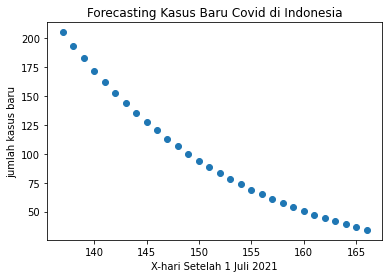

In [157]:
# melakukan plot grafik predict_date = x dan predict case = y
plt.scatter(x = predict_date, y = np.exp(predict_cases))

# menggunakan exponensial untuk me-reverse logarithmic transformation saat melakukan transformasi kolom kasus di atas

# membuat label pada grafik, sumbu x, dan sumbu y 
plt.title('Forecasting Kasus Baru Covid di Indonesia')
plt.xlabel('X-hari Setelah 1 Juli 2021')
plt.ylabel('jumlah kasus baru')

plt.show()

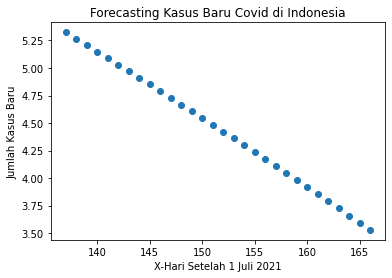

In [35]:
#Disini kita akan melakukan plot grafik predict_date = x dan predict case = y
#Jangan lupa import matplotlib pada sel library/package


# expected result

In [158]:
'''
Berikan Analisis kalian disini.
1. tentang grafik prediksi
2. tentang pemilihan polynomial regression dan model secara umum







'''

'\nBerikan Analisis kalian disini.\n1. tentang grafik prediksi\n2. tentang pemilihan polynomial regression dan model secara umum\n\n\n\n\n\n\n\n'

In [182]:
cases = np.exp(predict_cases)
new_df = pd.DataFrame({'Jumlah Kasus Baru' : cases})
predict_date = pd.DataFrame(predict_date)
new_df['Hari setelah 1 Juli 2021'] = predict_date
display(new_df)

,Jumlah Kasus Baru,Hari setelah 1 Juli 2021
0,205.372264,137
1,193.714504,138
2,182.673208,139
3,172.218553,140
4,162.322000,141
5,152.956239,142
6,144.095155,143
7,135.713773,144
8,127.788224,145
9,120.295703,146


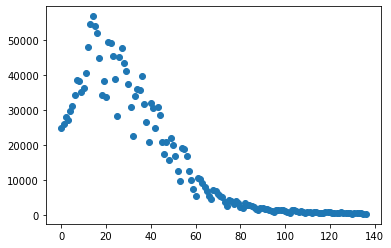

In [186]:
# melakukan plot grafik predict_date = x dan predict case = y
plt.scatter(data = data, x = 'days', y = 'Kasus_harian')
plt.show()

====================================================================================

interpretation~

dari hasil analisis di atas menggunakan regresi polynomial, dapat diperoleh bahwa :

1. tren yang terbentuk melalui grafik prediksi adalah tren yang menurun secara exponensial dengan hari pertama prediksi jumlah kasus baru mencapai 205 orang sampai hari ke-30 prediksi jumlah kasus barunya mencapai 34 orang, berarti prediksi ini hanya dilakukan selama 1 bulan saja. Nilai R2 atau nilai koefisien determinasinya adalah 0.9576, artinya 95.76% variansi variabel y dalam hal ini jumlah kasus baru dapat dijelaskan oleh variabel x, sedangkan sisanya yaitu sebesar 4.24% dijelaskan oleh variabel lain di luar model, tentunya model ini sangat bagus dan cocok. Hal ini tentunya akan menjadi berita yang sangat baik untuk Indonesia. Sebagai catatan, karena dalam hal ini kasusnya adalah menggunakan regresi polynomial, maka perlu diperhatikan apakah variabel x yang merupakan variabel waktu yaitu hari, benar-benar berpengaruh terhadap kasus baru atau bagaimana, tentunya ini harus dibicarakan oleh pihak yang lebih ahli, terutama yang menyangkut dalam permasalahan teoritisnya.

2. kalau dilihat dari grafik awal antara variabel kasus harian dengan variabel hari, memang lebih cocok menggunakan regresi polynomial, karena grafiknya menunjukkan tren exponensial menurun. Apabila ditarik sebuah garis lurus, tentu akan sangat tidak cocok. sehingga regresi polynomial cocok untuk case ini.